In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load the YM dataset (this datased was previously created with pandas to better organize the sample's data)
samples_abs_df = pd.read_csv('YM2_dataset.csv')
samples_abs_df['abs_avg'] = samples_abs_df['abs_avg'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['abs_std'] = samples_abs_df['abs_std'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['freq'] = samples_abs_df['freq'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['tl_avg'] = samples_abs_df['tl_avg'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['tl_std'] = samples_abs_df['tl_std'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['real_k'] = samples_abs_df['real_k'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['imag_k'] = samples_abs_df['imag_k'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['real_z'] = samples_abs_df['real_z'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['imag_z'] = samples_abs_df['imag_z'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df = samples_abs_df.set_index('sample')
#samples_abs_df.head(5)
samples_abs_df.columns
#samples_abs_df['mass']

Index(['abs_avg', 'abs_std', 'density', 'granul', 'thickness', 'mass',
       'resflux', 'dens_value', 'freq', 'tl_avg', 'tl_std', 'real_k', 'imag_k',
       'real_z', 'imag_z'],
      dtype='object')

### Characteristic Impedance

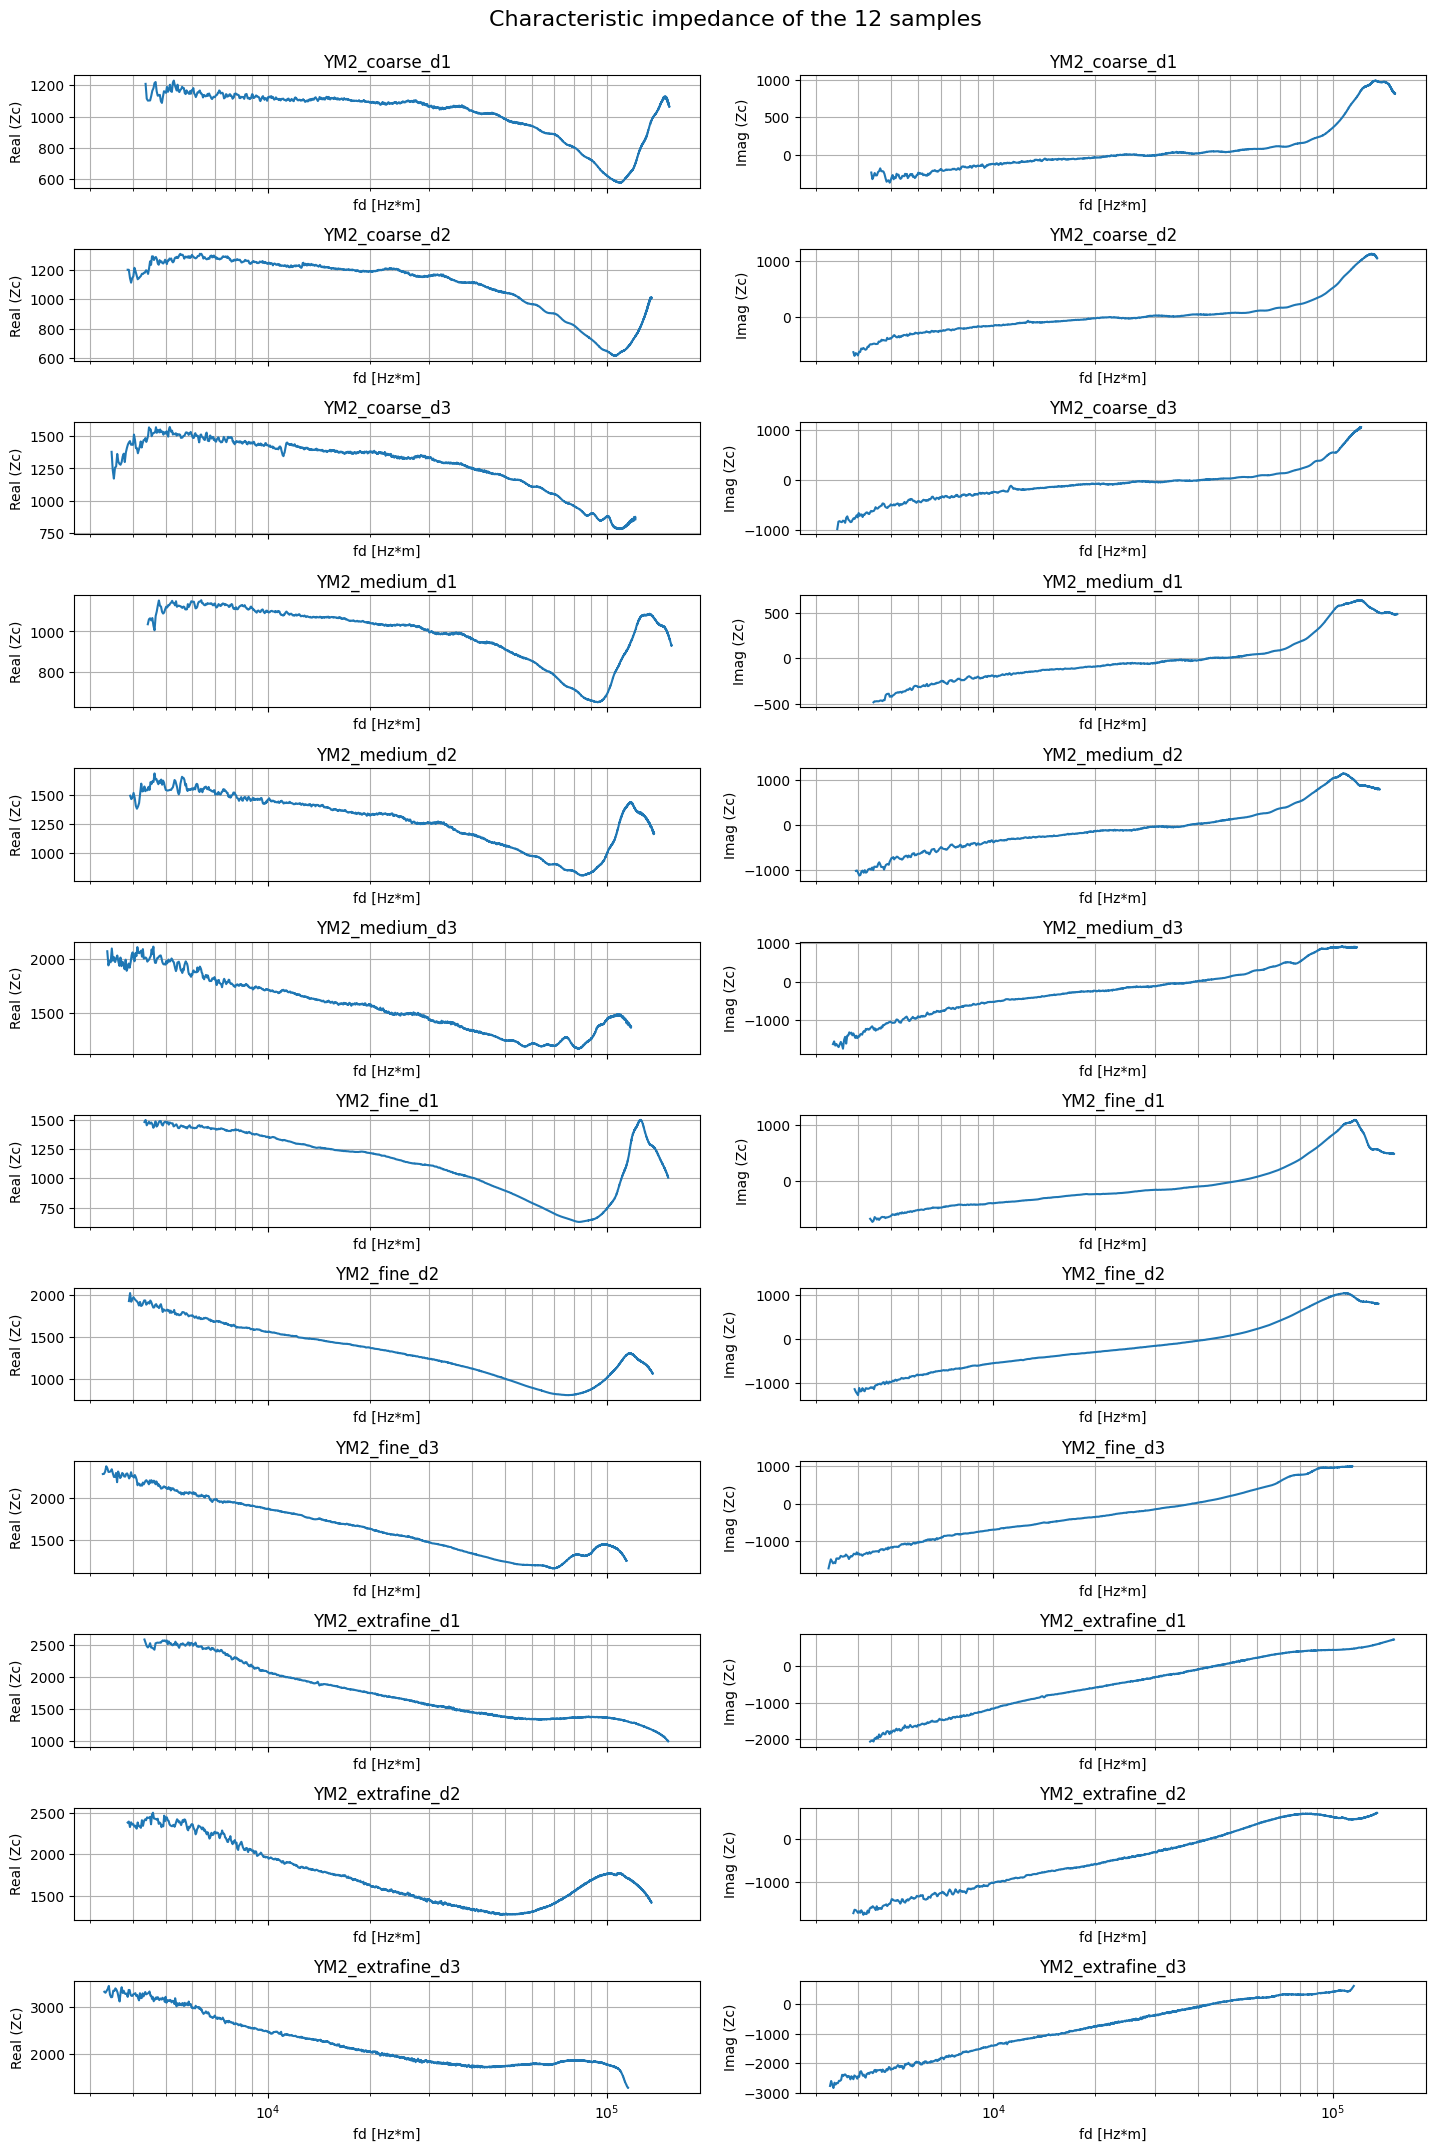

In [2]:
ncols = (samples_abs_df['density'].unique()).size   
nrows = (samples_abs_df['granul'].unique()).size  

fig, ax = plt.subplots(nrows*ncols, 2, figsize=(15,22), squeeze=False, sharex=True)
#ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=3.5)

#Characteristic Impedance

for i in range(0, nrows*ncols):
    realz_avgdata = np.array(samples_abs_df.iloc[i]['real_z'])     #Average real Zc
    imagz_avgdata = np.array(samples_abs_df.iloc[i]['imag_z'])     #Average imag Zc
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency
   
    
    #Plot over frequency*thickness (in order to compare samples with different thicknesses)
    ax[i][0].semilogx(fd, realz_avgdata)      #Plot over frequency*thickness
    #ax[i][0].semilogx(fd, realz_avgdata)      #Plot over frequency
    ax[i][0].set_title(f'{sample_name}')
    #ax[i].set_xlabel('Frequency [Hz]')
    ax[i][0].set_xlabel('fd [Hz*m]')
    #ax[i].set_ylim([0, 1.1])
    ax[i][0].set_ylabel('Real (Zc)')
    ax[i][0].grid(which='both')


    ax[i][1].semilogx(fd, imagz_avgdata)      #Plot over frequency*thickness
    ax[i][1].set_title(f'{sample_name}')
    #ax[i].set_xlabel('Frequency [Hz]')
    ax[i][1].set_xlabel('fd [Hz*m]')
    #ax[i].set_ylim([0, 1.1])
    ax[i][1].set_ylabel('Imag (Zc)')
    ax[i][1].grid(which='both')
fig.subplots_adjust(top=0.95)
fig.suptitle('Characteristic impedance of the 12 samples',fontsize=16)
plt.show()

### Wavenumber

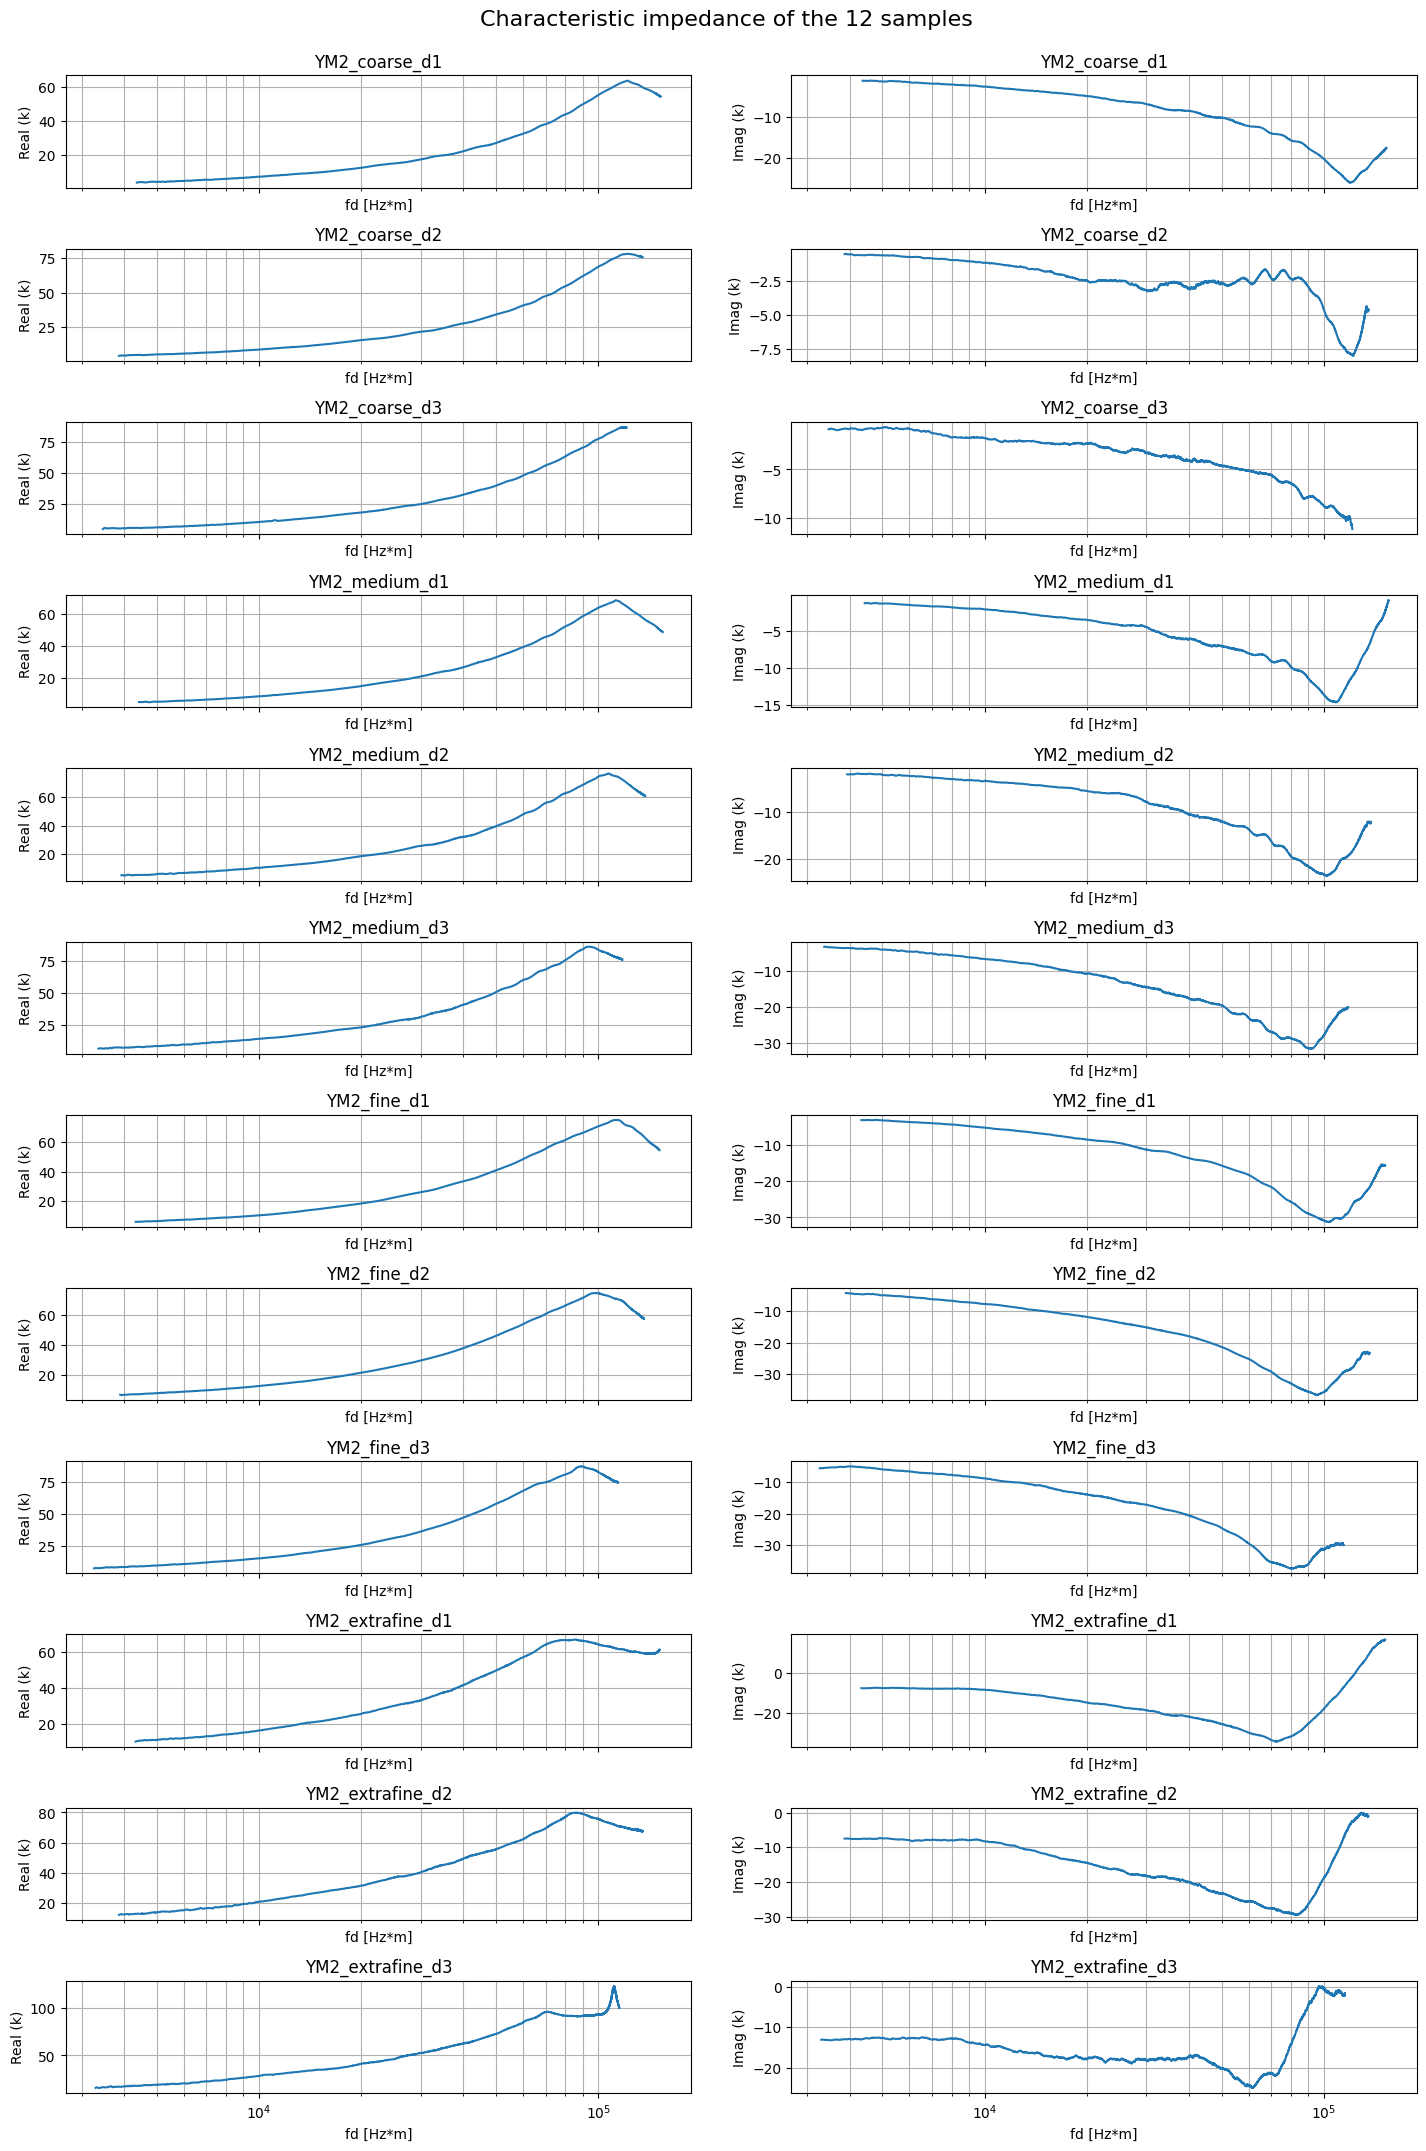

In [3]:
fig, ax = plt.subplots(nrows*ncols, 2, figsize=(15,22), squeeze=False, sharex=True)
#ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=3.5)

#Characteristic Impedance

for i in range(0, nrows*ncols):
    realk_avgdata = np.array(samples_abs_df.iloc[i]['real_k'])     #Average real Zc
    imagk_avgdata = np.array(samples_abs_df.iloc[i]['imag_k'])     #Average imag Zc
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency*thickness (in order to compare samples with different thicknesses)
    ax[i][0].semilogx(fd, realk_avgdata)      #Plot over frequency*thickness
    #ax[i][0].semilogx(freq, realk_avgdata)      #Plot over frequency
    ax[i][0].set_title(f'{sample_name}')
    #ax[i].set_xlabel('Frequency [Hz]')
    ax[i][0].set_xlabel('fd [Hz*m]')
    #ax[i].set_ylim([0, 1.1])
    ax[i][0].set_ylabel('Real (k)')
    ax[i][0].grid(which='both')


    ax[i][1].semilogx(fd, imagk_avgdata)      #Plot over frequency*thickness
    #ax[i][1].semilogx(freq, imagk_avgdata)      #Plot over frequency
    ax[i][1].set_title(f'{sample_name}')
    #ax[i].set_xlabel('Frequency [Hz]')
    ax[i][1].set_xlabel('fd [Hz*m]')
    #ax[i].set_ylim([0, 1.1])
    ax[i][1].set_ylabel('Imag (k)')
    ax[i][1].grid(which='both')
fig.subplots_adjust(top=0.95)
fig.suptitle('Characteristic impedance of the 12 samples',fontsize=16)
plt.show()

### Velocity of sound inside the material

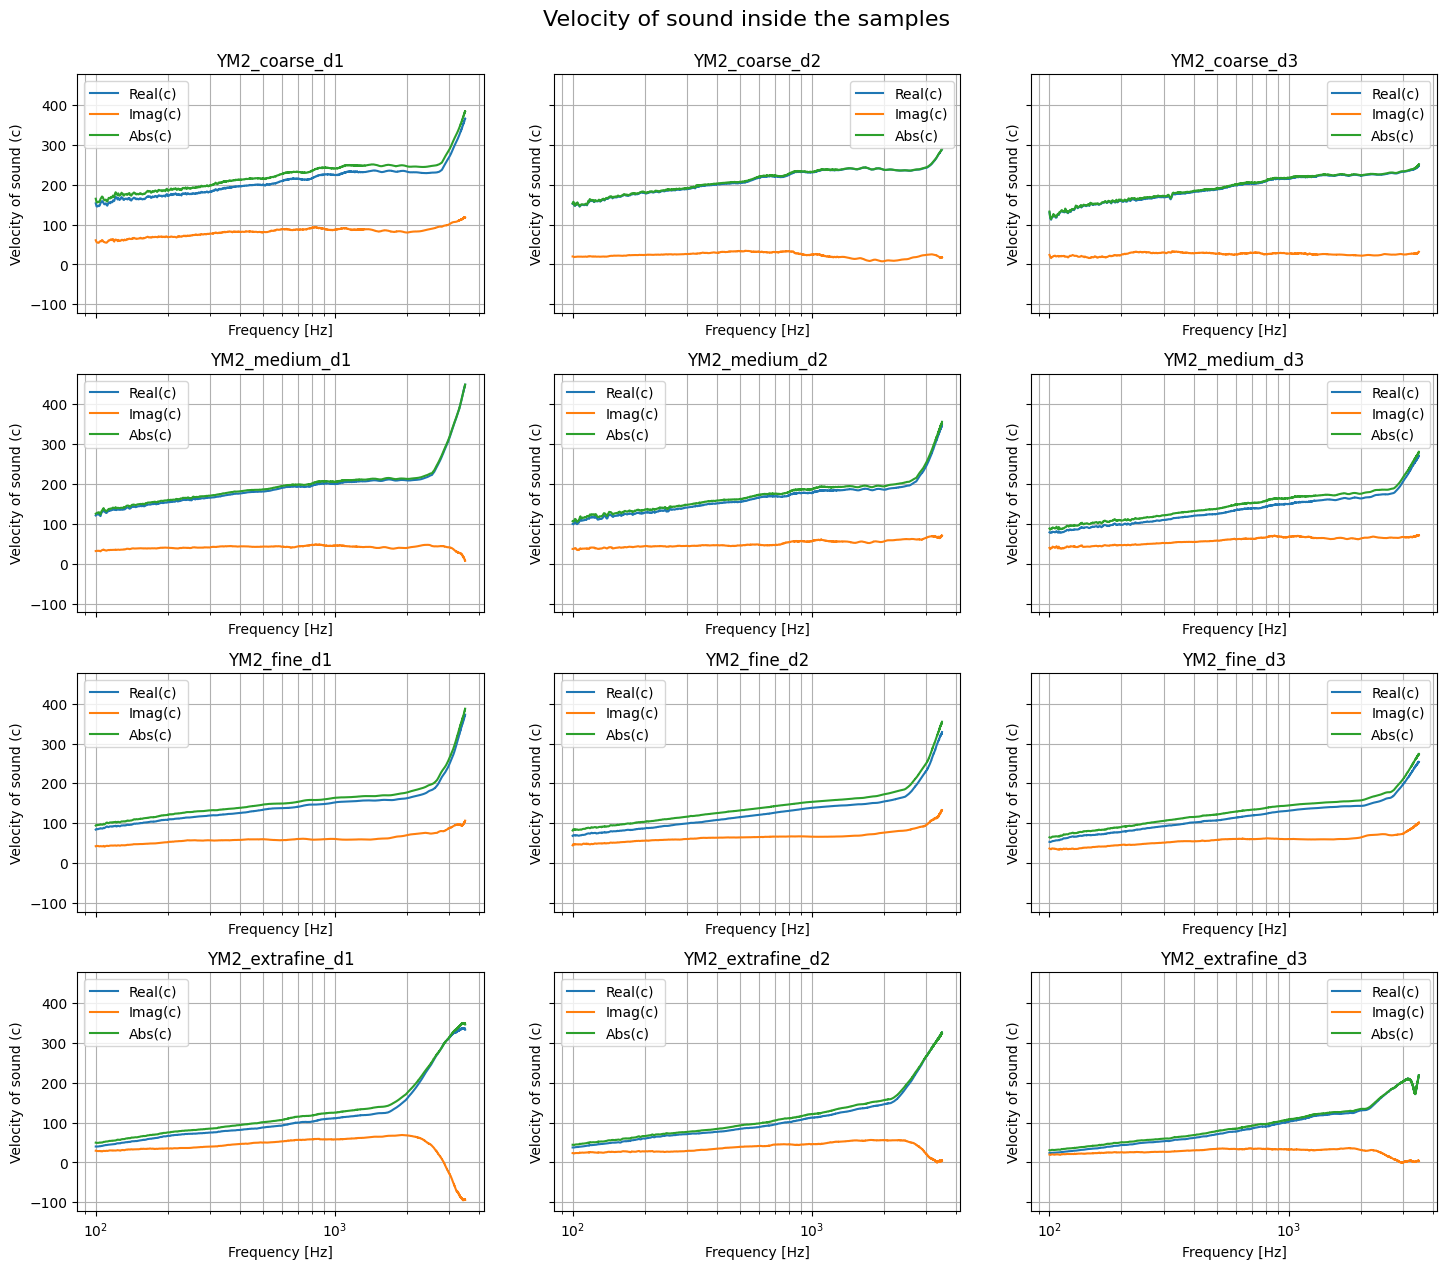

In [32]:
n_samples = samples_abs_df.index.size
samples_abs_df.loc[:,'real_c'] = 1
samples_abs_df.loc[:,'imag_c'] = 1
samples_abs_df['real_c'] = samples_abs_df['real_c'].astype('object') 
samples_abs_df['imag_c'] = samples_abs_df['imag_c'].astype('object') 

for i in samples_abs_df.index:
    samples_abs_df.at[i, 'real_c'] = list(np.real(2*np.pi*freq/(np.array(samples_abs_df.loc[i]['real_k']) + 1j*np.array(samples_abs_df.loc[i]['imag_k']))))
    samples_abs_df.at[i, 'imag_c'] = list(np.imag(2*np.pi*freq/(np.array(samples_abs_df.loc[i]['real_k']) + 1j*np.array(samples_abs_df.loc[i]['imag_k']))))

'''
fig, ax = plt.subplots(nrows*ncols, 2, figsize=(15,22), squeeze=False, sharex=True)
#ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=3.5)

#Characteristic Impedance

for i in range(0, nrows*ncols):
    realc_avgdata = np.array(samples_abs_df.iloc[i]['real_c'])     #Average real Zc
    imagc_avgdata = np.array(samples_abs_df.iloc[i]['imag_c'])     #Average imag Zc
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency*thickness (in order to compare samples with different thicknesses)
    ax[i][0].semilogx(freq, realc_avgdata)      #Plot over frequency*thickness
    #ax[i][0].semilogx(freq, realk_avgdata)      #Plot over frequency
    ax[i][0].set_title(f'{sample_name}')
    #ax[i].set_xlabel('Frequency [Hz]')
    ax[i][0].set_xlabel('fd [Hz*m]')
    #ax[i].set_ylim([0, 1.1])
    ax[i][0].set_ylabel('Real (c)')
    ax[i][0].grid(which='both')


    ax[i][1].semilogx(freq, imagc_avgdata)      #Plot over frequency*thickness
    #ax[i][1].semilogx(freq, imagk_avgdata)      #Plot over frequency
    ax[i][1].set_title(f'{sample_name}')
    #ax[i].set_xlabel('Frequency [Hz]')
    ax[i][1].set_xlabel('fd [Hz*m]')
    #ax[i].set_ylim([0, 1.1])
    ax[i][1].set_ylabel('Imag (c)')
    ax[i][1].grid(which='both')
fig.subplots_adjust(top=0.95)
fig.suptitle('Sound velocity inside the material',fontsize=16)
plt.show()
'''

fig, ax = plt.subplots(nrows, ncols, figsize=(15,13), squeeze=False, sharex=True, sharey=True)
ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=3.5)

for i, axe in enumerate(ax):
    realc_avgdata = np.array(samples_abs_df.iloc[i]['real_c'])     #Average real Zc
    imagc_avgdata = np.array(samples_abs_df.iloc[i]['imag_c'])     #Average imag Zc
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency*thickness (in order to compare samples with different thicknesses)
    axe.semilogx(freq, realc_avgdata, label=r'Real(c)')      #Plot over frequency*thickness
    axe.semilogx(freq, imagc_avgdata, label=r'Imag(c)')      #Plot over frequency*thickness
    comp = realc_avgdata + 1j*imagc_avgdata
    axe.semilogx(freq, np.abs(comp), label=r'Abs(c)')      #Plot over frequency*thickness
    axe.set_title(f'{sample_name}')
    axe.set_xlabel('Frequency [Hz]')
    #axe.set_xlabel('fd [Hz*m]')
    #axe.set_ylim([0, 1.1])
    axe.set_ylabel('Velocity of sound (c)')
    axe.grid(which='both')
    axe.legend()
    
fig.subplots_adjust(top=0.93)
fig.suptitle('Velocity of sound inside the samples',fontsize=16)
plt.show()

### Dynamic mass density (rho):

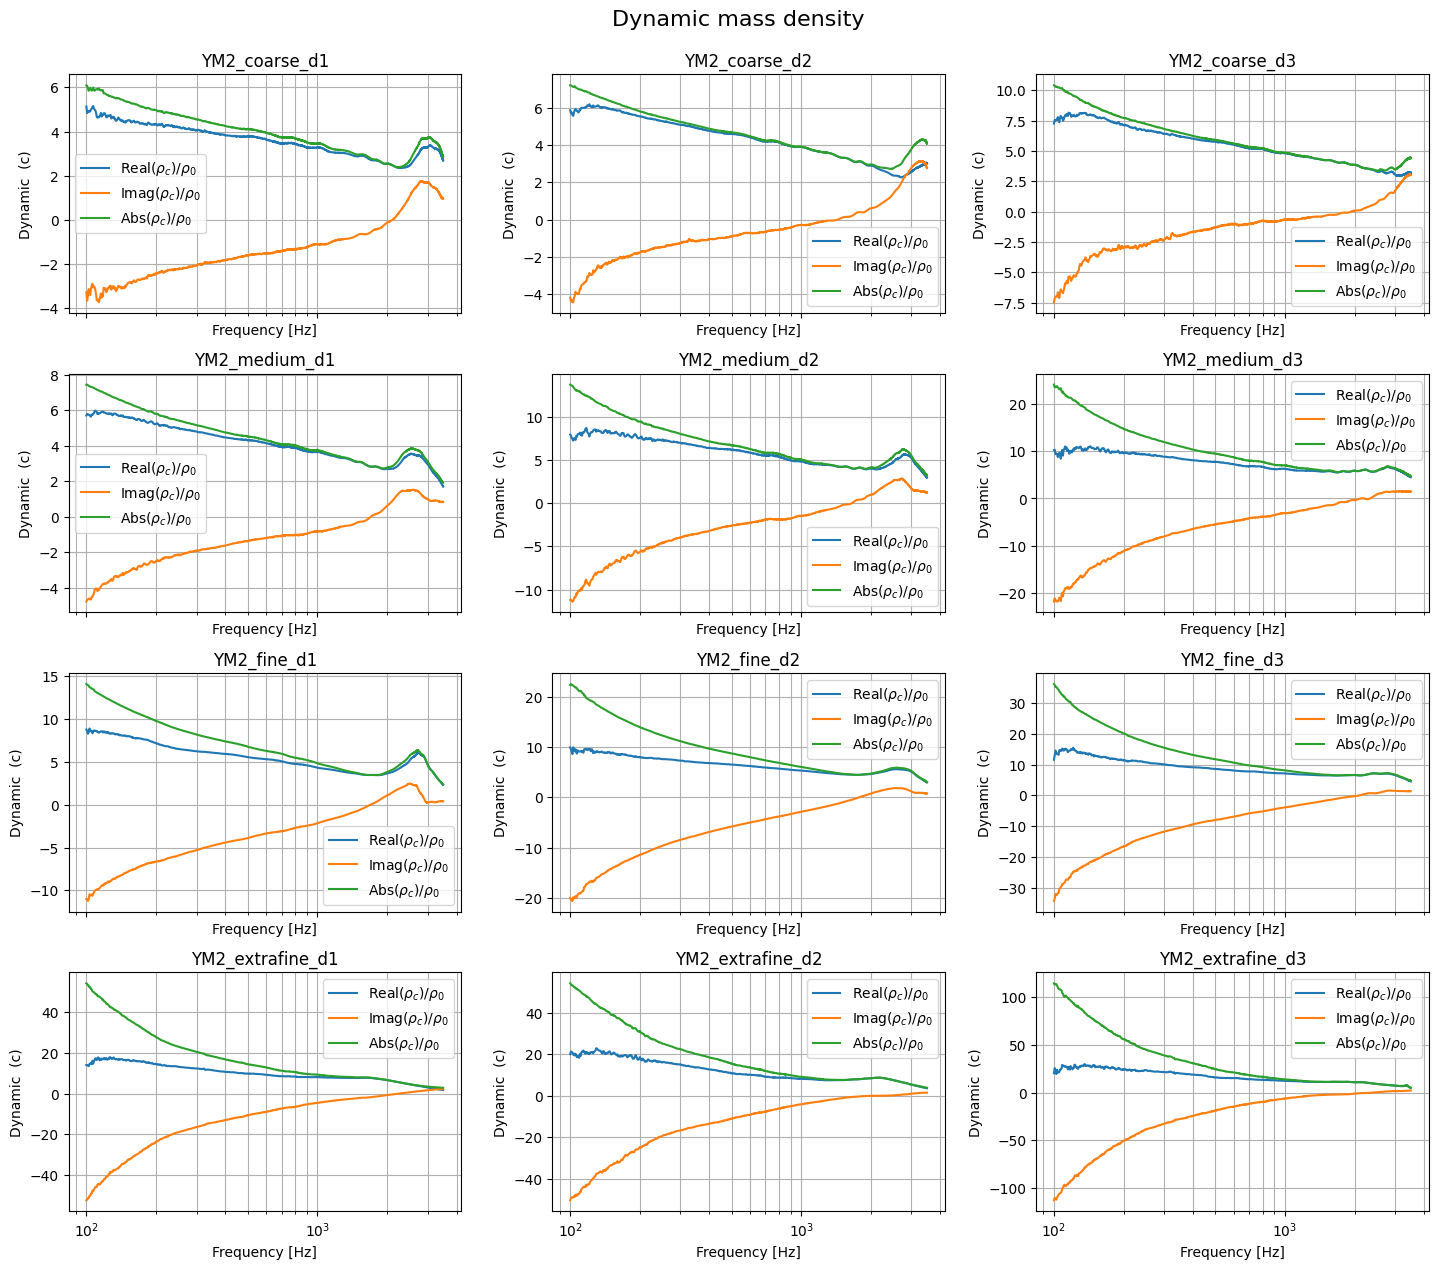

In [46]:
n_samples = samples_abs_df.index.size
samples_abs_df.loc[:,'real_rho'] = 1
samples_abs_df.loc[:,'imag_rho'] = 1
samples_abs_df['real_rho'] = samples_abs_df['real_rho'].astype('object') 
samples_abs_df['imag_rho'] = samples_abs_df['imag_rho'].astype('object') 

rho0 = 1.225  #Density of air kg/m^3

for i in samples_abs_df.index:
    zc = np.array(samples_abs_df.loc[i]['real_z']) + 1j*np.array(samples_abs_df.loc[i]['imag_z'])
    k = np.array(samples_abs_df.loc[i]['real_k']) + 1j*np.array(samples_abs_df.loc[i]['imag_k'])
    samples_abs_df.at[i, 'real_rho'] = list(np.real((zc*k)/(2*np.pi*freq)))
    samples_abs_df.at[i, 'imag_rho'] = list(np.imag((zc*k)/(2*np.pi*freq)))
    
#fig, ax = plt.subplots(nrows*ncols, 2, figsize=(15,22), squeeze=False, sharex=True)
#ax = ax.flatten()   #This line makes one index ax
#fig.tight_layout(pad=3.5)

#Dynamic mass density (rhoc)
''' 
for i in range(0, nrows*ncols):
    realrho_avgdata = np.array(samples_abs_df.iloc[i]['real_rho'])     #Average real Zc
    imagrho_avgdata = np.array(samples_abs_df.iloc[i]['imag_rho'])     #Average imag Zc
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency*thickness (in order to compare samples with different thicknesses)
    ax[i][0].semilogx(freq, realrho_avgdata)      #Plot over frequency*thickness
    ax[i][0].set_title(f'{sample_name}')
    #ax[i].set_xlabel('Frequency [Hz]')
    ax[i][0].set_xlabel('fd [Hz*m]')
    #ax[i].set_ylim([0, 1.1])
    ax[i][0].set_ylabel('Real (c)')
    ax[i][0].grid(which='both')

    ax[i][1].semilogx(freq, imagrho_avgdata)      #Plot over frequency*thickness
    ax[i][1].set_title(f'{sample_name}')
    #ax[i].set_xlabel('Frequency [Hz]')
    ax[i][1].set_xlabel('fd [Hz*m]')
    #ax[i].set_ylim([0, 1.1])
    ax[i][1].set_ylabel('Imag (c)')
    ax[i][1].grid(which='both')
fig.subplots_adjust(top=0.95)
fig.suptitle('Dynamic mass density',fontsize=16)
plt.show()

'''

fig, ax = plt.subplots(nrows, ncols, figsize=(15,13), squeeze=False, sharex=True)
ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=3.5)

for i, axe in enumerate(ax):
    realrho_avgdata = np.array(samples_abs_df.iloc[i]['real_rho'])/rho0     #Average real Zc
    imagrho_avgdata = np.array(samples_abs_df.iloc[i]['imag_rho'])/rho0     #Average imag Zc
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency*thickness (in order to compare samples with different thicknesses)
    axe.semilogx(freq, realrho_avgdata, label=r'Real($\rho_{c}$)/$\rho_{0}$')      #Plot over frequency*thickness
    axe.semilogx(freq, imagrho_avgdata, label=r'Imag($\rho_{c}$)/$\rho_{0}$')      #Plot over frequency*thickness
    comp = realrho_avgdata + 1j*imagrho_avgdata
    axe.semilogx(freq, np.abs(comp), label=r'Abs($\rho_{c}$)/$\rho_{0}$')      #Plot over frequency*thickness
    axe.set_title(f'{sample_name}')
    axe.set_xlabel('Frequency [Hz]')
    #axe.set_xlabel('fd [Hz*m]')
    #axe.set_ylim([0, 1.1])
    axe.set_ylabel('Dynamic  (c)')
    axe.grid(which='both')
    axe.legend()
    
fig.subplots_adjust(top=0.93)
fig.suptitle('Dynamic mass density',fontsize=16)
plt.show()




### Bulk modulus (K):

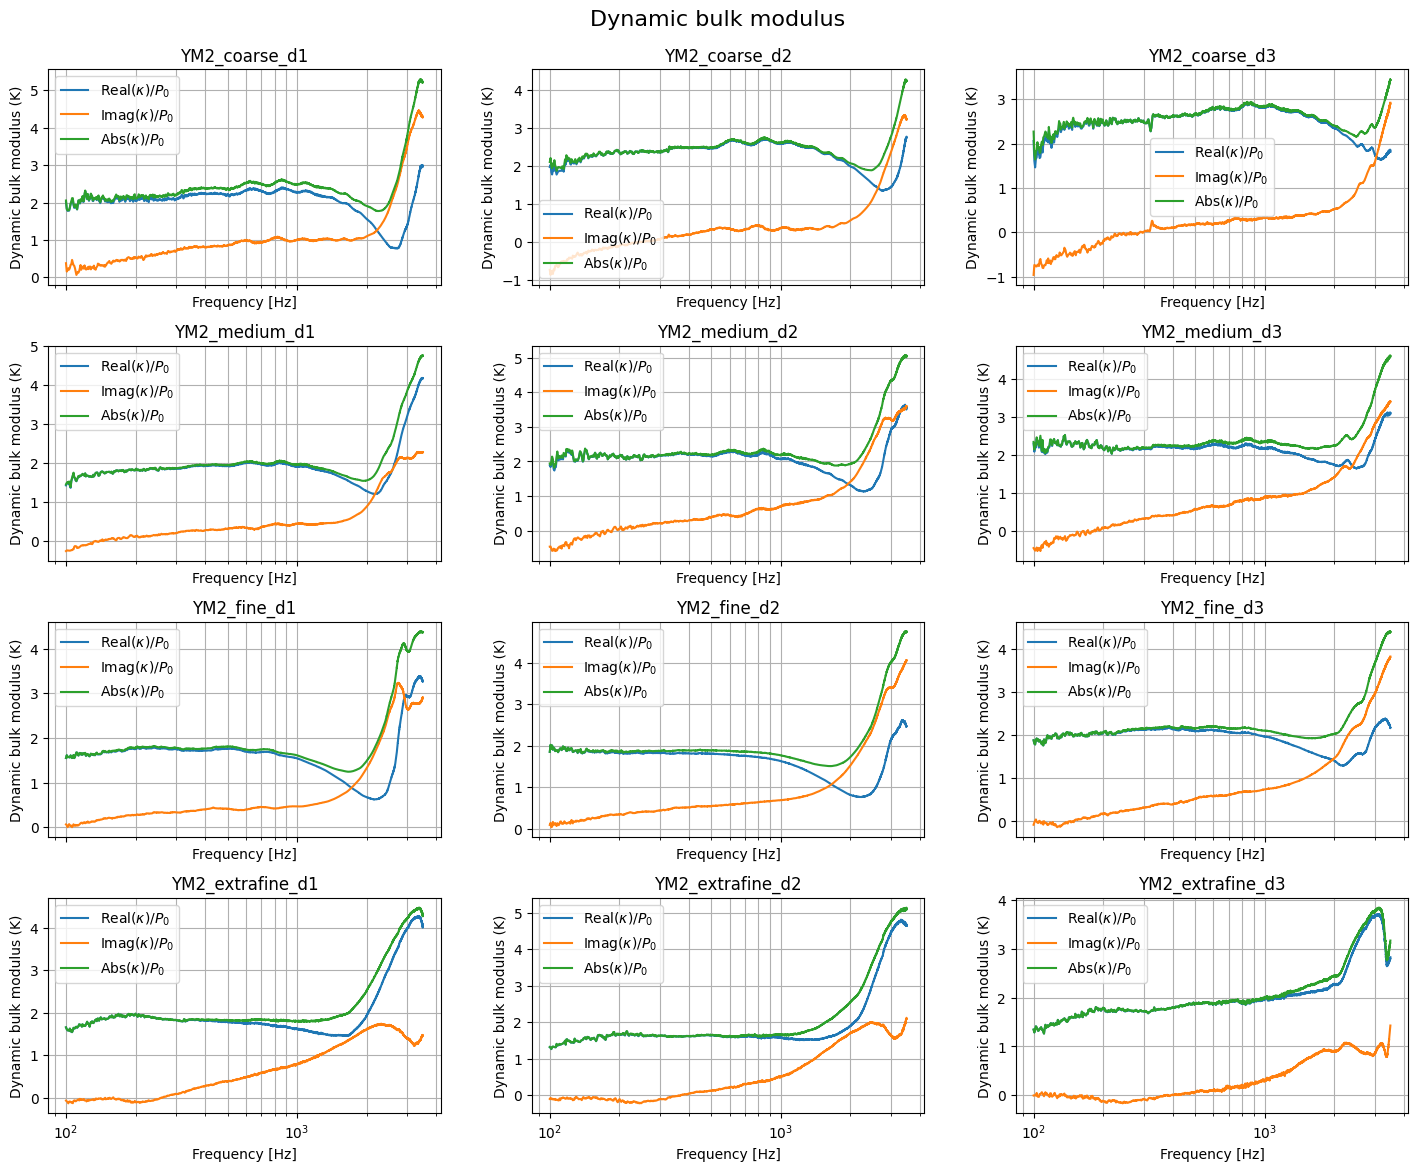

In [50]:
n_samples = samples_abs_df.index.size
samples_abs_df.loc[:,'real_K'] = 1
samples_abs_df.loc[:,'imag_K'] = 1
samples_abs_df['real_K'] = samples_abs_df['real_K'].astype('object') 
samples_abs_df['imag_K'] = samples_abs_df['imag_K'].astype('object') 

p_atm = 99000 #Atmospheric pressure [Pa]

for i in samples_abs_df.index:
    zc = np.array(samples_abs_df.loc[i]['real_z']) + 1j*np.array(samples_abs_df.loc[i]['imag_z'])
    k = np.array(samples_abs_df.loc[i]['real_k']) + 1j*np.array(samples_abs_df.loc[i]['imag_k'])
    samples_abs_df.at[i, 'real_K'] = list(np.real((zc*2*np.pi*freq)/k))
    samples_abs_df.at[i, 'imag_K'] = list(np.imag((zc*2*np.pi*freq)/k))


fig, ax = plt.subplots(nrows, ncols, figsize=(15,12), squeeze=False, sharex=True)
ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=3.5)

for i, axe in enumerate(ax):
    realK_avgdata = np.array(samples_abs_df.iloc[i]['real_K'])/p_atm     #Average real Kc
    imagK_avgdata = np.array(samples_abs_df.iloc[i]['imag_K'])/p_atm     #Average imag Kc
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency*thickness (in order to compare samples with different thicknesses)
    axe.semilogx(freq, realK_avgdata, label=r'Real($\kappa$)/$P_{0}$')      #Plot over frequency*thickness
    axe.semilogx(freq, imagK_avgdata, label=r'Imag($\kappa$)/$P_{0}$')      #Plot over frequency*thickness
    comp = realK_avgdata + 1j*imagK_avgdata
    axe.semilogx(freq, np.abs(comp), label=r'Abs($\kappa$)/$P_{0}$')      #Plot over frequency*thickness
    axe.set_title(f'{sample_name}')
    axe.set_xlabel('Frequency [Hz]')
    #axe.set_xlabel('fd [Hz*m]')
    #axe.set_ylim([0, 1.1])
    axe.set_ylabel('Dynamic bulk modulus (K)')
    axe.grid(which='both')
    axe.legend()
    
fig.subplots_adjust(top=0.93)
fig.suptitle('Dynamic bulk modulus',fontsize=16)
plt.show()

### Porosity from the low and high frequencie asymptotes of Real(K)

### Static air-flow resistivity from the Imag(rho_c) --> low frequency limit